# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [140]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

df=pd.read_csv('diabetes.csv')

In [72]:
print(df.isnull().sum())    
## no nulls but later we will discover they are likely replaces with the value Zero

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [9]:
print(  df.duplicated().sum())
## no duplicates

0


In [50]:
df.describe(include='all')
## Stats for everyone
## One of our questions was avg age, we can see it is 33.2


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [64]:
diabetes_yes = df['Outcome'] == 1  ## boolean mask filter for those with diabetes
df[diabetes_yes].describe(include='all')

## Stats for those WITH Diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [66]:
diabetes_no = df['Outcome'] == 0  ## boolean mask filter for those without diabetes
df[diabetes_no].describe(include='all')

## Stats for those WITHOUT diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


<Axes: xlabel='Pregnancies', ylabel='Count'>

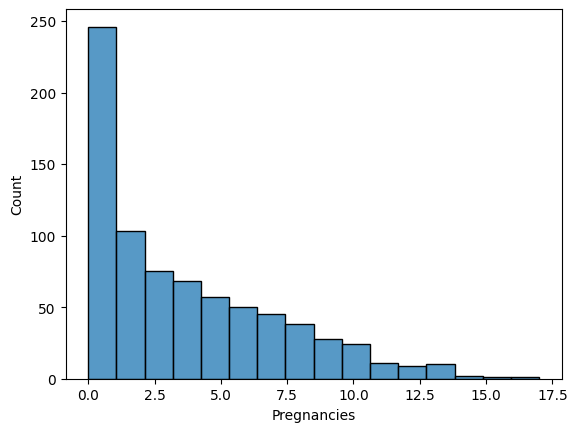

In [21]:
sns.histplot(df['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Count'>

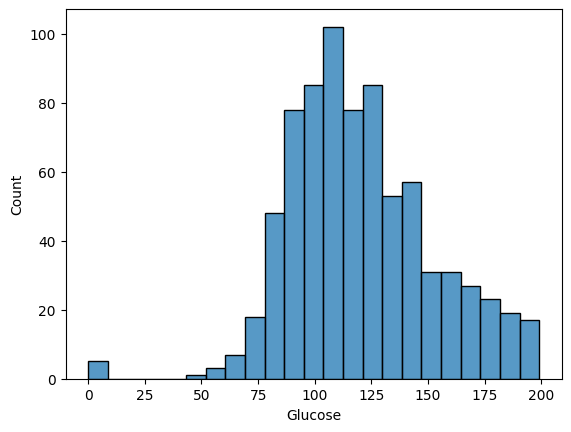

In [22]:
sns.histplot(df['Glucose'])
## A few zeros we need to get rid of
## This dataset likely used 0 for missing data instead of NaN

<Axes: xlabel='SkinThickness', ylabel='Count'>

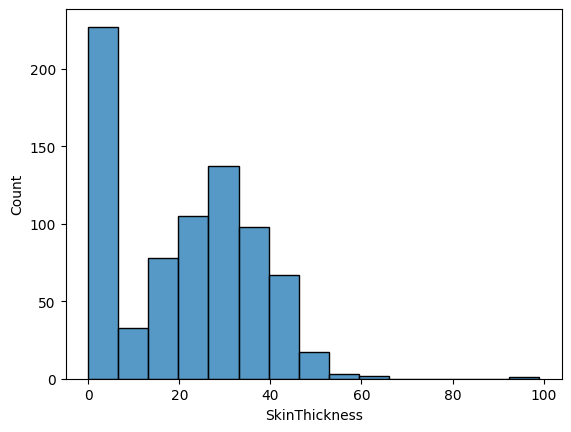

In [24]:
sns.histplot(df['SkinThickness'])
## about 1/3 are zero/NA 
## the 99 is probably a mistake also

<Axes: xlabel='Insulin', ylabel='Count'>

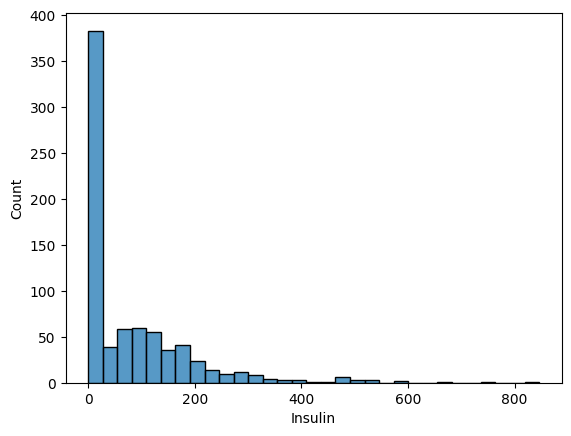

In [28]:
sns.histplot(df['Insulin'])
## almost half of these values are zero/NA so we may have to drop the column

<Axes: xlabel='BMI', ylabel='Count'>

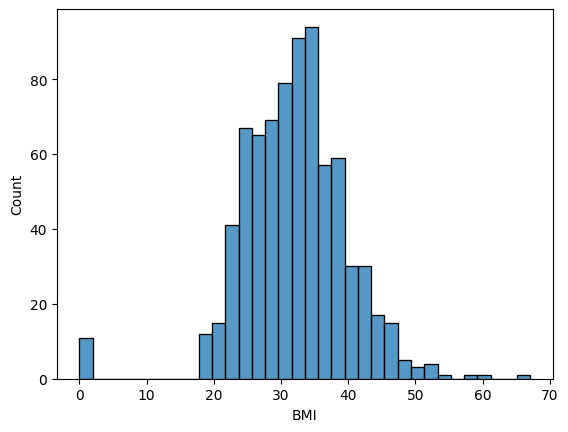

In [29]:
sns.histplot(df['BMI'])
## A few zero/NA to remove

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

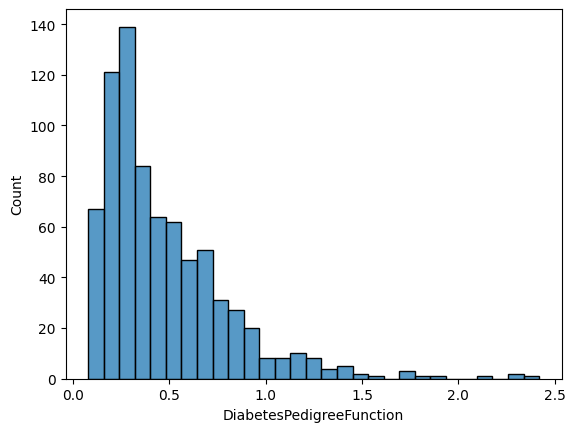

In [31]:
sns.histplot(df['DiabetesPedigreeFunction'])
## Looks good

<Axes: xlabel='Age', ylabel='Count'>

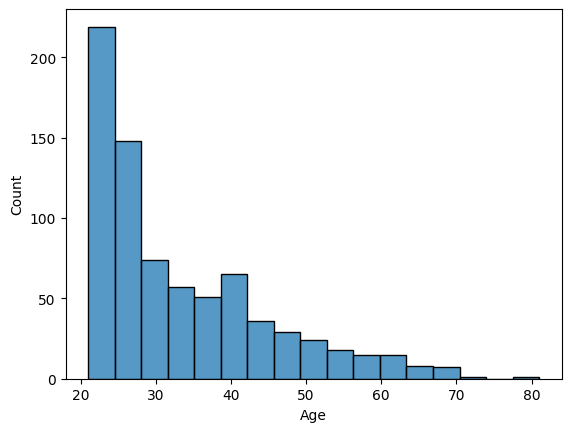

In [32]:
sns.histplot(df['Age'])
## Looks good

Checking Relationships between predictors

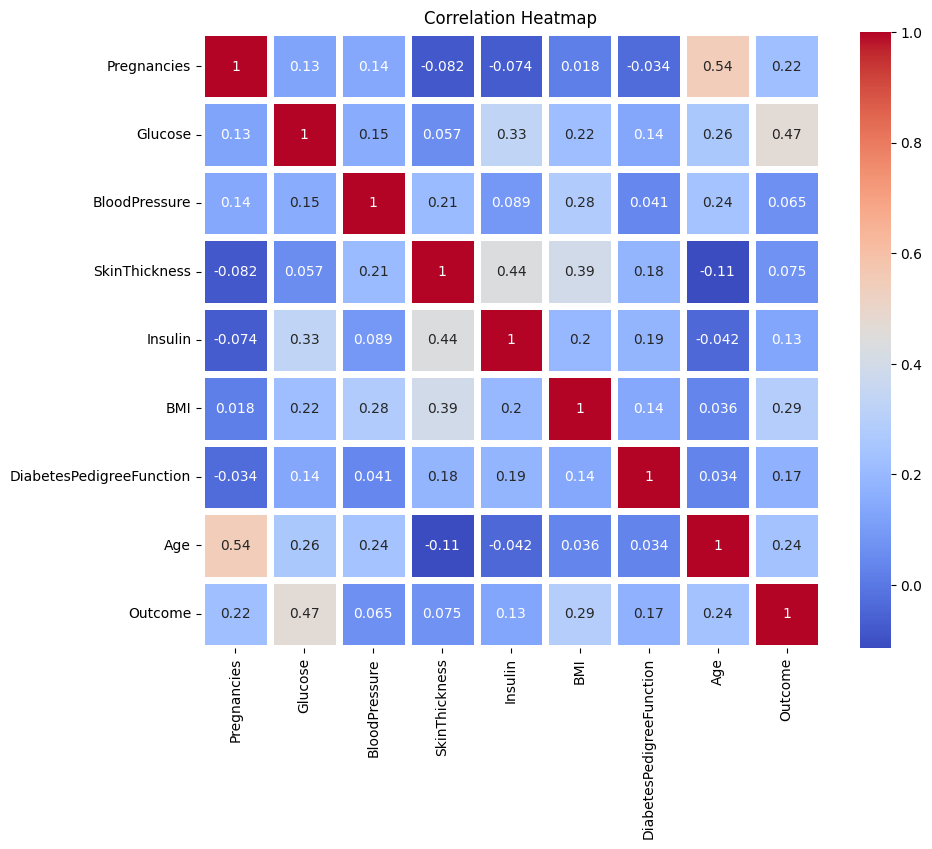

In [59]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm', linewidths=5)
plt.title("Correlation Heatmap")
plt.show()
## There does not appear to be any significant relationship between the predictors

Now we can answer the questions asked up top


- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

<h3>Answers<h3>

- Yes but they were recorded as zeroes
- The mean of the predictors is higher in every column for the group that has a positive outcome variable
- There is no significant correlation
- normal distribution
- yes there were a few outliers that we have to remove
- There is no significant correlation
- There is no significant correlation
- The average age is 33.2
- avg glucose WITTH diabetes is 141 and 109 for those WITHOUT
- avg BMI WITH diabetes is 35.1 and  30.3   for those WITHOUT
- No male and female data available

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

Handling Missing Values - We can See from the histograms above that Zeros were likely used instead of Nulls so we have to remove them

In [75]:
cleandf=df.copy()  ## making a new df to work with
cleandf.replace(0, np.nan, inplace=True)
cleandf['Outcome'] = cleandf['Outcome'].replace( np.nan  ,0)  ## We want to keep the zeros in the outcome column so we change it back

cleandf.isnull().sum()

## zero pregnancies are ok
## Insulin is almost half and must be dropped
## The rest we can remove those rows


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [76]:
cleandf = cleandf.drop('Insulin', axis=1)
cleandf.dropna(inplace=True)
cleandf.describe(include='all')

## Drops the insulin column and removes rows with missing data

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,4.112088,120.118681,71.083516,28.789011,32.258462,0.499675,32.617582,0.329670
std,3.221378,30.986340,12.198869,10.375308,6.314420,0.328464,10.973281,0.470611
min,1.000000,56.000000,24.000000,7.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,97.000000,64.000000,21.000000,27.700000,0.259500,24.000000,0.000000
50%,3.000000,113.000000,72.000000,29.000000,32.400000,0.415000,29.000000,0.000000
75%,6.000000,142.000000,78.000000,36.000000,36.100000,0.660500,40.000000,1.000000
max,17.000000,199.000000,110.000000,99.000000,57.300000,2.329000,81.000000,1.000000


Outliers

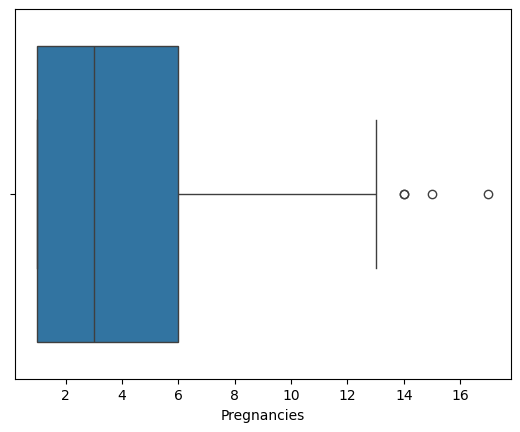

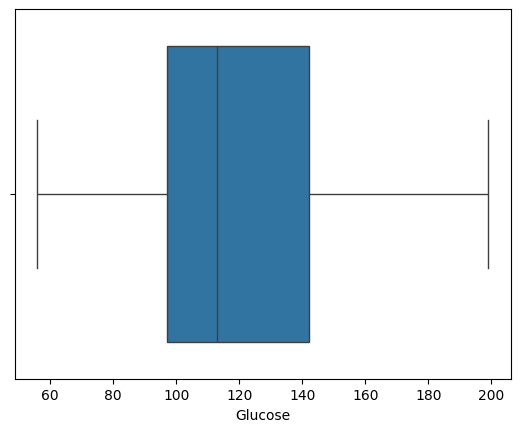

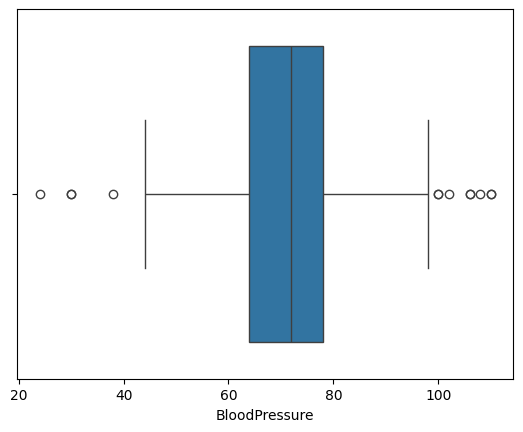

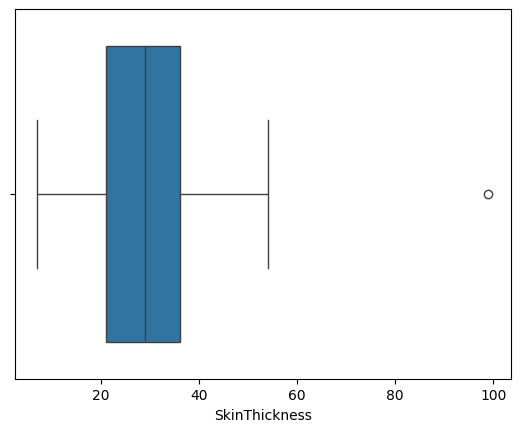

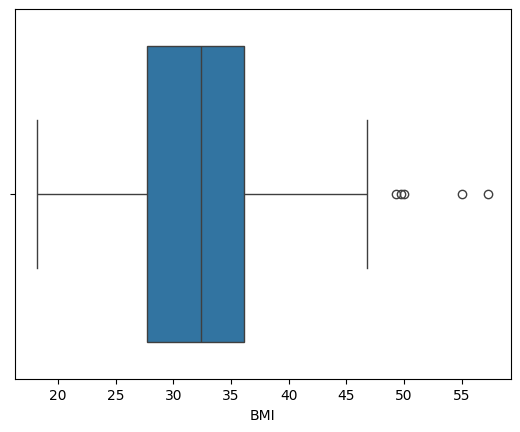

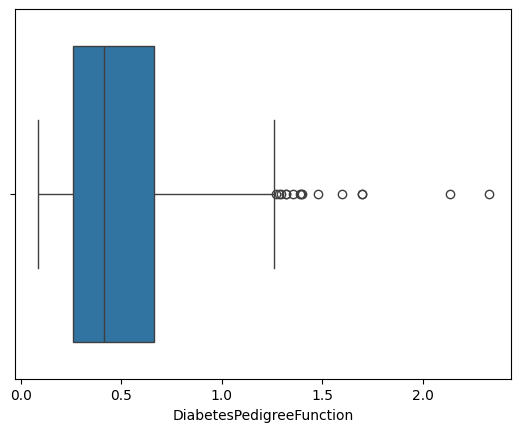

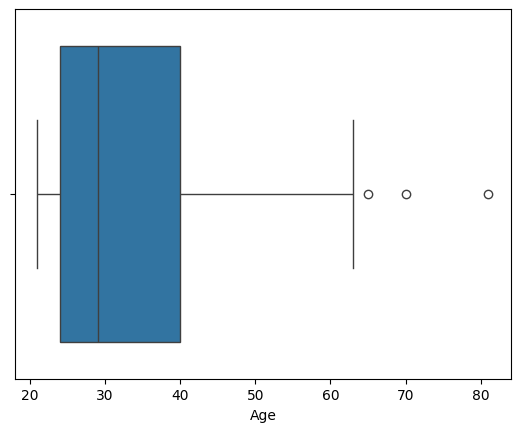

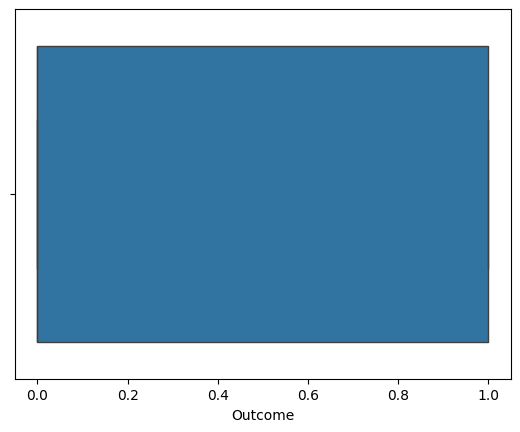

In [79]:
for column in cleandf.columns:
    plt.figure()
    sns.boxplot(x = column, data = cleandf)

    ## we can see quite a few that need removing

In [86]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1  ## gets quartiles and IQR
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)  ## setting the limits of allowable datapoints, 1.5*IQR is standard
    filter = (df >= lower_bound) & (df <= upper_bound)
    return df[filter]

cleandf2 = cleandf.iloc[:, :-1].apply(remove_outliers, axis=0)  ## Creates our new cleandf2 by applying the function to all columns except Outcome
cleandf2 = pd.concat([cleandf2, cleandf.iloc[:, -1]], axis=1)  ## Rejoins our cleandf2 with the Outcome column

## we will use cleandf2 from now on

In [94]:
cleandf2.dropna(inplace=True)  ## the previous function left a more Nulls that we need to drop


Split into Train and Test

In [225]:
X = cleandf2.drop('Outcome', axis=1)
y = cleandf2['Outcome']
## seperates the target and predictor variables


In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
## splits the data into 80% for training and 20% for testing


Standardization of the data

In [227]:
## Because the X variables are all in different scales we have to standardize them before modeling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)  ## we dont fit the test data to avoid data leakage

## we dont need to scale the Y values because that is the target

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [198]:
basemodel=LogisticRegression()
basemodel.fit(X_train_scaled,y_train)  ## starting with a baseline logistic regression model
y_pred=basemodel.predict(X_test_scaled)

LogisticRegression()

In [199]:
## Get roc_auc score


roc_auc = roc_auc_score(y_test, y_pred)



print(roc_auc)


0.6875


In [200]:
## get f1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1}')


F1 Score: 0.5263157894736842


In [201]:
## get accuracy score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7857142857142857


<h3>Base Model Results:</h3>   
- Accuracy: 0.78     <br>
- roc_auc_score: 0.68      <br>
- F1 score: 0.52 <br>

No we will try an ensemble model

In [250]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=25)  ## I tried many numbers of estimators but around 25 seems to give the best results

rfc.fit(X_train_scaled, y_train)

y_rfc_pred=rfc.predict(X_test_scaled)

In [251]:
## get accuracy score
rfcaccuracy = accuracy_score (y_test,y_rfc_pred)
print(rfcaccuracy)

0.8333333333333334


In [252]:
## get roc_auc score
rfc_roc_auc = roc_auc_score(y_test, y_rfc_pred)
print(rfc_roc_auc)

0.7678571428571429


In [253]:
## get f1 score
rfc_f1 = f1_score(y_test, y_rfc_pred)
print(f'F1 Score: {f1}')

F1 Score: 0.5263157894736842


<h3>Random Forest Results:</h3>   
- Accuracy: 0.83     <br>
- roc_auc_score: 0.76     <br>
- F1 score: 0.52 <br>

This model performs a bit better than the baseline

In [211]:
feature_scores=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_scores

## we can see the bloodpressure is the least important feature, so lets try the model without using that

Glucose                     0.259502
Age                         0.177135
DiabetesPedigreeFunction    0.143747
BMI                         0.122474
Pregnancies                 0.115564
SkinThickness               0.092977
BloodPressure               0.088601
dtype: float64

Dropping the least important feature

In [214]:
X = cleandf2.drop(['Outcome', 'BloodPressure'] ,axis=1)
y = cleandf2['Outcome']
## taking out the target and the  least important variable


In [215]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_scaled = scaler.fit_transform(X_train)   ## same as above
X_test_scaled = scaler.transform(X_test)


In [217]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train_scaled, y_train)

y_rfc_pred=rfc.predict(X_test_scaled)

rfcaccuracy = accuracy_score (y_test,y_rfc_pred)
print(rfcaccuracy)

## Dropping the least important feature resulted in lower accuracy so we will not drop it

0.7023809523809523


From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [ ]:
##  - Glucose is the most important feature for predicting diabetes, and blood pressure is the least important
##  -  The mean of people with diabetes is higher in every predictor column than those without
##  - We should recommend the data be collected better so there arent so many missing values
## - All features are important when predicting if the patient has  diabetes or not